C:\Users\samue\AppData\Local\Temp\ipykernel_16680\363991666.py:36: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), multichannel=True)


Best parameters for SVM: {'C': 0.1}
Mean cross-validation score for SVM: 0.98
Accuracy scores for SVM: [0.97777778 0.97777778 1.         0.97777778 0.97777778 1.
 0.97777778 0.95555556 0.95454545 0.97727273]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       149
           1       0.99      0.98      0.99       150
           2       0.96      0.97      0.97       149

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448

Confusion matrix:
 [[146   0   3]
 [  0 147   3]
 [  3   1 145]]
Cohen's Kappa: 0.9665181907865236


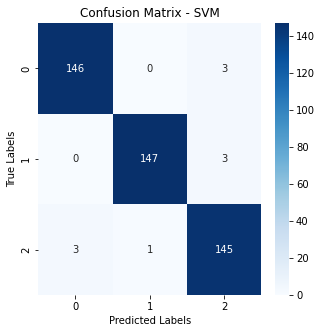

Best parameters for Logistic Regression: {'C': 1}
Mean cross-validation score for Logistic Regression: 0.98
Accuracy scores for Logistic Regression: [1.         0.95555556 1.         0.97777778 0.97777778 1.
 0.97777778 0.95555556 0.93181818 0.97727273]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.99      0.99      0.99       150
           2       0.97      0.95      0.96       149

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448

Confusion matrix:
 [[147   0   2]
 [  0 148   2]
 [  5   2 142]]
Cohen's Kappa: 0.9631694593503835


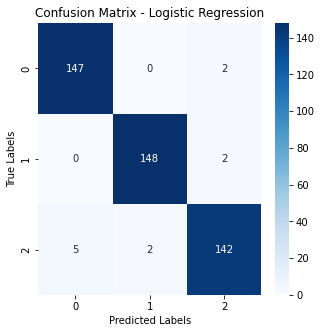

Best parameters for K-Nearest Neighbors: {'leaf_size': 10, 'n_neighbors': 5}
Mean cross-validation score for K-Nearest Neighbors: 0.96
Accuracy scores for K-Nearest Neighbors: [1.         0.97777778 0.95555556 0.91111111 0.95555556 1.
 0.95555556 0.95555556 0.93181818 0.95454545]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       149
           1       0.99      0.98      0.99       150
           2       0.96      0.92      0.94       149

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448

Confusion matrix:
 [[146   0   3]
 [  0 147   3]
 [ 11   1 137]]
Cohen's Kappa: 0.9397327434157424


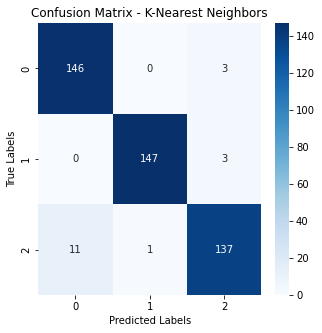

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20}
Mean cross-validation score for Decision Tree: 0.87
Accuracy scores for Decision Tree: [0.91111111 0.82222222 0.93333333 0.86666667 0.84444444 0.84444444
 0.93333333 0.8        0.86363636 0.88636364]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       149
           1       0.95      0.94      0.94       150
           2       0.83      0.77      0.79       149

    accuracy                           0.87       448
   macro avg       0.87      0.87      0.87       448
weighted avg       0.87      0.87      0.87       448

Confusion matrix:
 [[133   0  16]
 [  1 141   8]
 [ 27   8 114]]
Cohen's Kappa: 0.7991076433263828


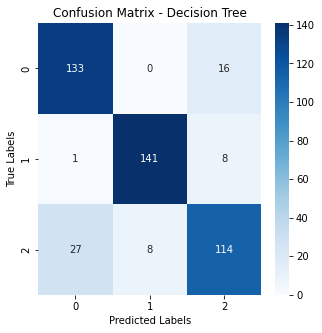

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import cohen_kappa_score
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns

#Path defination
Disease = 'C:/Users/samue/Downloads/Disease'
Category = ["C:/Users/samue/Downloads/Disease/PNEUMONIA",
            "C:/Users/samue/Downloads/Disease/TURBERCULOSIS",
            "C:/Users/samue/Downloads/Disease/COVID19"]

# Define a dictionary to map the labels to integers
label_map = {'PNEUMONIA': 0, 'TURBERCULOSIS': 1, 'COVID19': 2}


# Define empty lists to hold the image data and labels
X = []
y = []

# Iterate through the categories and load the images 
for label, disease_dir in enumerate(Labels):
    for image_file in os.listdir(disease_dir):
        # Load the image and resize it to a fixed size (e.g., 224x224)
        image = cv2.imread(os.path.join(disease_dir, image_file))
        image = cv2.resize(image, (224, 224))
        # Compute HOG features for the image
        hog_features = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), multichannel=True)
        # Add the HOG features to the X array
        X.append(hog_features)
        # Add the label to the y array
        y.append(label)

# Convert the data to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets using 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# Compute the confusion matrix and Cohen's Kappa
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for each classifier
svm_params = {'C': [0.1, 1, 10]}
logreg_params = {'C': [0.1, 1, 10]}
knn_params = {'n_neighbors': [3, 5, 7], 'leaf_size': [10, 20, 30]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30]}


# Define the classifiers with the default hyperparameters
svm_clf = SVC(kernel='linear')
logreg_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()

# Define a dictionary to hold the hyperparameters for each classifier
params_dict = {'SVM': svm_params, 'Logistic Regression': logreg_params, 
               'K-Nearest Neighbors': knn_params, 'Decision Tree': dt_params}

# Train/test the classifiers using cross-validation and hyperparameter tuning
for clf, label in zip([svm_clf, logreg_clf, knn_clf, dt_clf], ['SVM', 'Logistic Regression', 
                                                               'K-Nearest Neighbors', 'Decision Tree']):
    # Perform hyperparameter tuning using grid search with cross-validation
    grid = GridSearchCV(clf, params_dict[label], cv=10, scoring='accuracy')
    grid.fit(X, y)
    
    # Print the best hyperparameters and mean cross-validation score
    print("Best parameters for {}: {}".format(label, grid.best_params_))
    print("Mean cross-validation score for {}: {:.2f}".format(label, grid.best_score_))
    
    # Train the classifier with the best hyperparameters on the entire dataset
    clf.set_params(**grid.best_params_)
    clf.fit(X, y)
    
    # Compute the F1 score, sensitivity, and specificity for each label
    y_pred = cross_val_predict(clf, X, y, cv=10)
    
    # Print the accuracy of each fold
    acc_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Accuracy scores for {}: {}".format(label, acc_scores))
    
    print(classification_report(y, y_pred))

    # Compute the confusion matrix and Cohen's Kappa
    cm = confusion_matrix(y, y_pred)
    print("Confusion matrix:\n", cm)
    print("Cohen's Kappa:", cohen_kappa_score(y, y_pred))
    
    
     # Plot confusion matrix heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}'.format(label))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

for clf, label in zip([svm_clf, logreg_clf, knn_clf, dt_clf], ['SVM', 'Logistic Regression', 'K-Nearest Neighbors', 
                                                               'Decision Tree']):
    # Perform hyperparameter tuning using grid search with cross-validation
    grid = GridSearchCV(clf, params_dict[label], cv=10, scoring='accuracy')
    grid.fit(X, y)
    for l in set(y):
        tn, fp, fn, tp = confusion_matrix(y, y_pred, labels=[l, 1-l]).ravel()
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # add check for denominator not zero
        print("%s - Label %d: Specificity: %0.2f, Sensitivity: %0.2f" % (label, l, specificity, sensitivity))

SVM - Label 0: Specificity: 1.00, Sensitivity: 0.99
SVM - Label 1: Specificity: 0.99, Sensitivity: 1.00
SVM - Label 2: Specificity: 1.00, Sensitivity: 0.00
Logistic Regression - Label 0: Specificity: 1.00, Sensitivity: 0.99
Logistic Regression - Label 1: Specificity: 0.99, Sensitivity: 1.00
Logistic Regression - Label 2: Specificity: 1.00, Sensitivity: 0.00
K-Nearest Neighbors - Label 0: Specificity: 1.00, Sensitivity: 0.99
K-Nearest Neighbors - Label 1: Specificity: 0.99, Sensitivity: 1.00
K-Nearest Neighbors - Label 2: Specificity: 1.00, Sensitivity: 0.00
Decision Tree - Label 0: Specificity: 1.00, Sensitivity: 0.99
Decision Tree - Label 1: Specificity: 0.99, Sensitivity: 1.00
Decision Tree - Label 2: Specificity: 1.00, Sensitivity: 0.00
